In [410]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [411]:
data=pd.read_excel(r'D:\data_storage\Projects\flight_price_ml\data.xlsx')
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [413]:
#---------------------------
#Cleaning
#---------------------------

In [414]:
sum=data.isnull().sum()
pd.DataFrame({'count':sum,'%':sum*100/data.shape[0]})

,count,%
Airline,0,0.000000
Date_of_Journey,0,0.000000
Source,0,0.000000
Destination,0,0.000000
Route,1,0.009361
Dep_Time,0,0.000000
Arrival_Time,0,0.000000
Duration,0,0.000000
Total_Stops,1,0.009361
Additional_Info,0,0.000000


In [415]:
#clearing rows with nulls
data.dropna(inplace=True)

In [416]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [417]:
#---------------------------
#Encoding
#---------------------------

In [418]:
#encoding categorical data

##source
#source=pd.get_dummies(data['Source'])
#source=source.rename({k:'Source_'+k for k in source.columns},axis=1)
#data=data.join(source)
##destination
#destination=pd.get_dummies(data['Destination'])
#destination=destination.rename({k:'Destination_'+k for k in destination.columns},axis=1)
#data=data.join(destination)

#source-destination
data['Source-Destination']=data[['Source','Destination']].apply('-'.join,axis=1)
source_destination=pd.get_dummies(data['Source-Destination'])
source_destination=source_destination.rename({k:'Route_'+k for k in source_destination.columns},axis=1)
data=data.join(source_destination)
#airline
airlines=data.groupby(['Airline'])['Price'].mean().sort_values()
data['Airline_Encoded']=data['Airline'].map(airlines)

data.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source-Destination,Route_Banglore-Delhi,Route_Banglore-New Delhi,Route_Chennai-Kolkata,Route_Delhi-Cochin,Route_Kolkata-Banglore,Route_Mumbai-Hyderabad,Airline_Encoded
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Banglore-New Delhi,0,1,0,0,0,0,5673.682903
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Kolkata-Banglore,0,0,0,0,1,0,9612.427756
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Delhi-Cochin,0,0,0,1,0,0,11643.923357


In [419]:
#converting to datetime
for col in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  data[col]=pd.to_datetime(data[col],dayfirst=True)

#converting time to decimal hours
for col in ['Dep_Time',"Arrival_Time"]:
  data[col+'_hour']=data[col].dt.hour+data[col].dt.minute/60

#converting date to month and day
data['Date_of_Journey_Month']=data['Date_of_Journey'].dt.month
data['Date_of_Journey_Day']=data['Date_of_Journey'].dt.day

data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Route_Banglore-New Delhi,Route_Chennai-Kolkata,Route_Delhi-Cochin,Route_Kolkata-Banglore,Route_Mumbai-Hyderabad,Airline_Encoded,Dep_Time_hour,Arrival_Time_hour,Date_of_Journey_Month,Date_of_Journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,...,1,0,0,0,0,5673.682903,22.333333,1.166667,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-19 05:50:00,2023-02-19 13:15:00,7h 25m,2 stops,No info,...,0,0,0,1,0,9612.427756,5.833333,13.250000,5,1


In [420]:
#parsing duration
def preprocess_duration(x):
  if 'h' not in x:
      x='0h '+x
  elif 'm' not in x:
      x=x+' 0m'
  return x

data['Duration']=data['Duration'].apply(preprocess_duration)

#data['Duration_hour']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
#data['Duration_minute']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))
def str_time_parser(x):
  a=x.split(' ')
  return(int(a[0][0:-1])+int(a[1][0:-1])/60)

data['Duration_hour']=data['Duration'].apply(lambda x: str_time_parser(x))

data[['Duration','Duration_hour']].head(2)



,Duration,Duration_hour
0,2h 50m,2.833333
1,7h 25m,7.416667


In [421]:
#counting number of stops
data['Stops_Count']=data['Route'].apply(lambda x: x.count('→')-1)

data[['Route','Stops_Count']].head(6)


,Route,Stops_Count
0,BLR → DEL,0
1,CCU → IXR → BBI → BLR,2
2,DEL → LKO → BOM → COK,2
3,CCU → NAG → BLR,1
4,BLR → NAG → DEL,1
5,CCU → BLR,0


In [422]:

data['Stops_Count'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Stops_Count, dtype: int64

In [423]:
#---------------------------
#Exploration
#---------------------------
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Route_Delhi-Cochin,Route_Kolkata-Banglore,Route_Mumbai-Hyderabad,Airline_Encoded,Dep_Time_hour,Arrival_Time_hour,Date_of_Journey_Month,Date_of_Journey_Day,Duration_hour,Stops_Count
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,...,0,0,0,5673.682903,22.333333,1.166667,3,24,2.833333,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-19 05:50:00,2023-02-19 13:15:00,7h 25m,2 stops,No info,...,0,1,0,9612.427756,5.833333,13.250000,5,1,7.416667,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-19 09:25:00,2023-06-10 04:25:00,19h 0m,2 stops,No info,...,1,0,0,11643.923357,9.416667,4.416667,6,9,19.000000,2


<Axes: xlabel='Airline', ylabel='Price'>

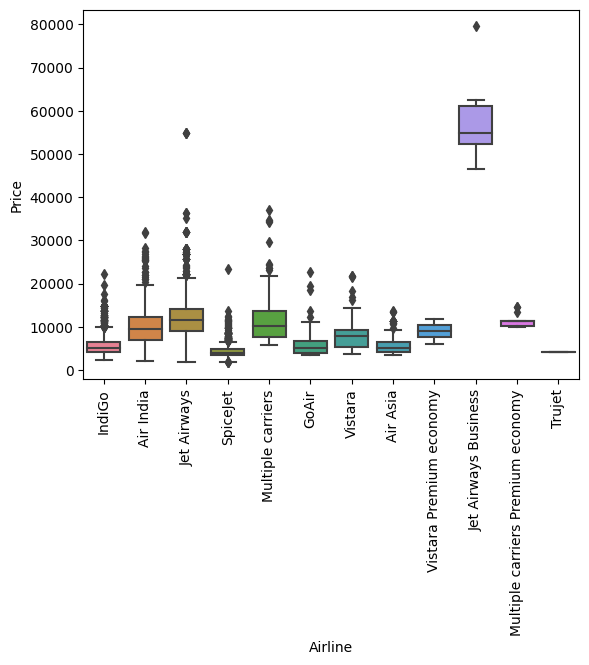

In [424]:
#A look at the effect of airline on price
plot=sns.boxplot(data=data,x='Airline',y='Price',palette="husl")
plt.setp(plot.get_xticklabels(),rotation=90)
plot


In [425]:
#fig,ax=plt.subplots(1,2)
#
#plot1=sns.boxplot(data=data,x='Source',y='Price',palette="husl",ax=ax[0])
#plt.setp(plot1.get_xticklabels(),rotation=90)
#
#plot2=sns.boxplot(data=data,x='Source-Destination',y='Price',palette="husl",ax=ax[1])
#plt.setp(plot2.get_xticklabels(),rotation=90)
#
#fig.show()
#
#fig,ax=plt.subplots(1,2)
#
#sorted_data=data.sort_values(['Destination'])
#
#plot3=sns.boxplot(data=sorted_data,x='Destination',y='Price',palette="husl",ax=ax[0])
#plt.setp(plot3.get_xticklabels(),rotation=90)
#
#plot4=sns.boxplot(data=sorted_data,x='Source-Destination',y='Price',palette="husl",ax=ax[1])
#plt.setp(plot4.get_xticklabels(),rotation=90)
#
#fig.show()


<Axes: xlabel='Source-Destination', ylabel='Price'>

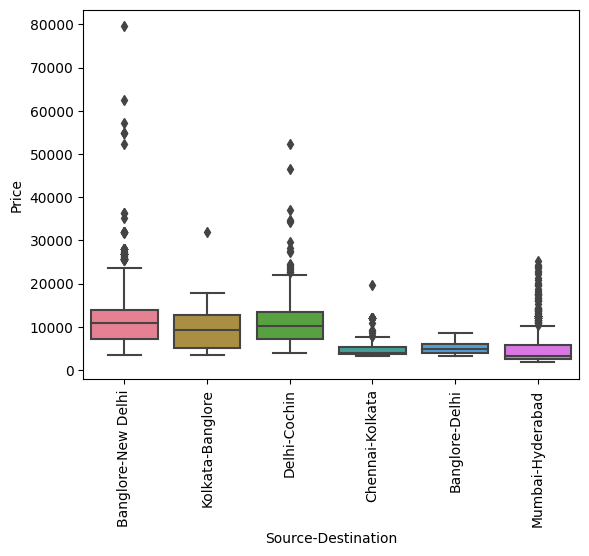

In [426]:
#A look at the effect of the route on price
plot2=sns.boxplot(data=data,x='Source-Destination',y='Price',palette="husl")
plt.setp(plot2.get_xticklabels(),rotation=90)
plot2

<Axes: xlabel='Stops_Count', ylabel='Price'>

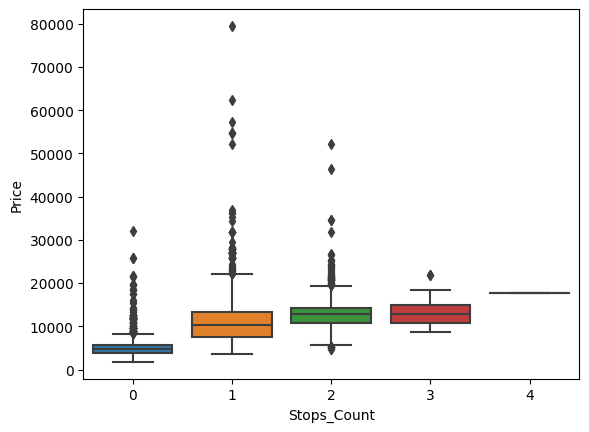

In [427]:
#Look a the effect of the number of stops on price
plot3=sns.boxplot(data=data,x='Stops_Count',y='Price')
plot3

<Axes: xlabel='Source-Destination', ylabel='Price'>

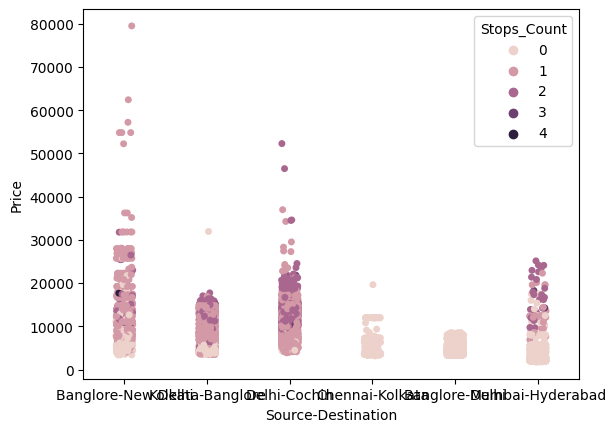

In [428]:
#Perhaps the reason the price increases with the number of stops
#is becaused it is a longer route...Let's see
plot4=sns.stripplot(data=data,x='Source-Destination',y='Price',hue='Stops_Count')
plot4

C:\Users\Danick Carrier\AppData\Local\Temp\ipykernel_12416\2321615535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Relative_Price']=subset['Price']/subset['Airline'].map(air_price_means)


<Axes: xlabel='Source-Destination', ylabel='Relative_Price'>

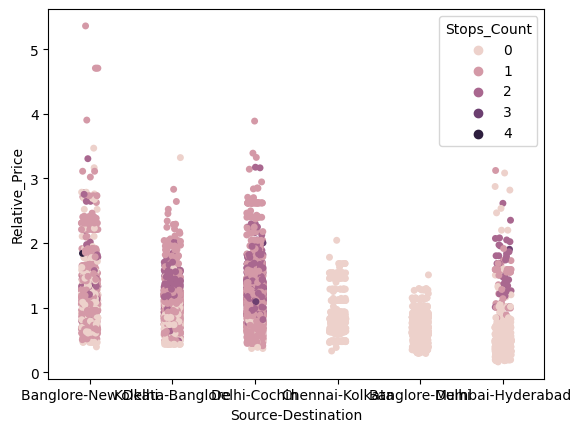

In [429]:
#There is no clear trend....Let's group by airline
subset=data[['Source-Destination','Price','Stops_Count','Airline']]
air_price_means=subset.groupby(['Airline'])['Price'].mean(['Price'])
air_price_means.head(5)
subset['Relative_Price']=subset['Price']/subset['Airline'].map(air_price_means)

plot5=sns.stripplot(data=subset,x='Source-Destination',y='Relative_Price',hue='Stops_Count')
plot5


#airlines=data.groupby(['Airline'])['Price'].mean().sort_values()
#data['Airline_Encoded']=data['Airline'].map(airlines)

C:\Users\Danick Carrier\AppData\Local\Temp\ipykernel_12416\1181408692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Relative_Price']=subset['Price']/subset['Source-Destination'].map(SD_price_means)


<Axes: xlabel='Source-Destination', ylabel='Relative_Price'>

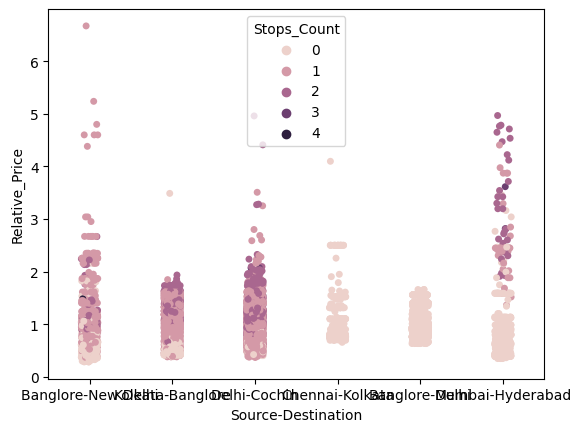

In [430]:
#The relation is still not clear, let's ajust for the route as well
SD_price_means=subset.groupby(['Source-Destination'])['Price'].mean(['Price'])
#air_price_means.head(5)
subset['Relative_Price']=subset['Price']/subset['Source-Destination'].map(SD_price_means)

plot6=sns.stripplot(data=subset,x='Source-Destination',y='Relative_Price',hue='Stops_Count')
plot6


In [431]:
#We can see that having more stops makes the flight more expensive
#on the Delhi-Hyderabad route, but it's not clear on the other ones...
subset=subset.groupby(['Stops_Count','Source-Destination'])['Relative_Price'].mean()
subset.info()
#plot6=sns.stripplot(data=subset,x='Source-Destination',y='Relative_Price',hue='Stops_Count')
#plot6

<class 'pandas.core.series.Series'>
MultiIndex: 19 entries, (0, 'Banglore-Delhi') to (4, 'Banglore-New Delhi')
Series name: Relative_Price
Non-Null Count  Dtype  
--------------  -----  
19 non-null     float64
dtypes: float64(1)
memory usage: 405.0+ bytes


In [ ]:
train_data=data.select_dtypes([np.number])
train_data.columns
